In [62]:
# Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Set visualization style
sns.set(style="whitegrid")

In [38]:
# Load the datasets
customers = pd.read_csv(r"C:\eCommerce\Customers.csv")
products = pd.read_csv(r"C:\eCommerce\Products.csv")
transactions = pd.read_csv(r"C:\eCommerce\Transactions.csv")

In [40]:
# Load the datasets by given drive link
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

In [42]:
customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

In [44]:
# Display the first few rows of each dataset
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [46]:
# Summary statistics and data overview
def data_overview(df, name):
    print(f"\n{name} Dataset Overview")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))

In [48]:
# Analyze each dataset
data_overview(customers, "Customers")
data_overview(products, "Products")
data_overview(transactions, "Transactions")


Customers Dataset Overview
--------------------------------------------------
Shape: (200, 4)
Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Summary Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Dataset Overview
--------------------------------------------------
Shape: (100, 4)
Columns: [

In [50]:
# Missing value analysis
def missing_values(df, name):
    print(f"\nMissing Values in {name} Dataset:")
    print(df.isnull().sum())

missing_values(customers, "Customers")
missing_values(products, "Products")
missing_values(transactions, "Transactions")


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


C:\Users\abhas\AppData\Local\Temp\ipykernel_10724\3423839989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='pastel')


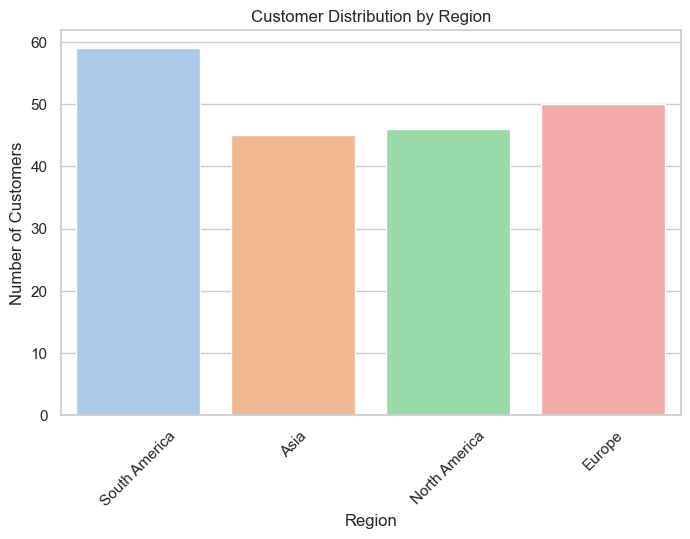

In [52]:
# Visualizations
# 1. Customer distribution by region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='pastel')
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

C:\Users\abhas\AppData\Local\Temp\ipykernel_10724\3010261277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y='Category', palette='pastel', order=products['Category'].value_counts().index)


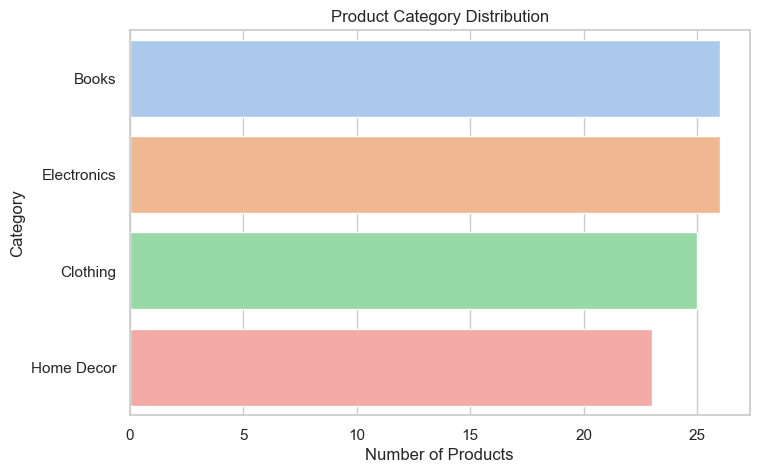

In [54]:
# 2. Product category distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=products, y='Category', palette='pastel', order=products['Category'].value_counts().index)
plt.title("Product Category Distribution")
plt.xlabel("Number of Products")
plt.show()

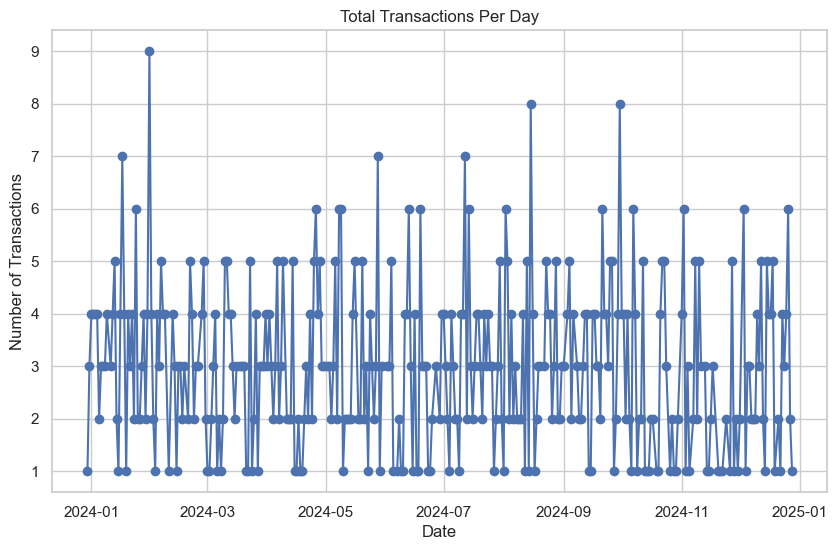

In [56]:
# 3. Total transactions per day
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Date'] = transactions['TransactionDate'].dt.date
transactions_per_day = transactions.groupby('Date').size()
plt.figure(figsize=(10, 6))
transactions_per_day.plot(title="Total Transactions Per Day", marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

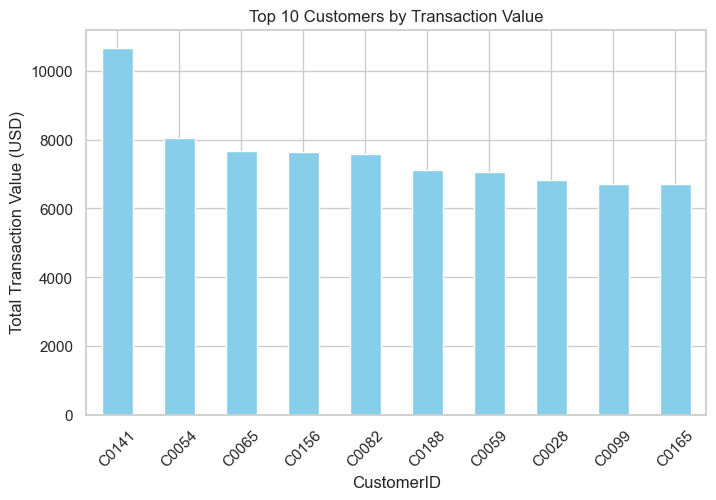

In [58]:
# 4. Top 10 customers by transaction value
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Top 10 Customers by Transaction Value")
plt.ylabel("Total Transaction Value (USD)")
plt.xticks(rotation=45)
plt.show()

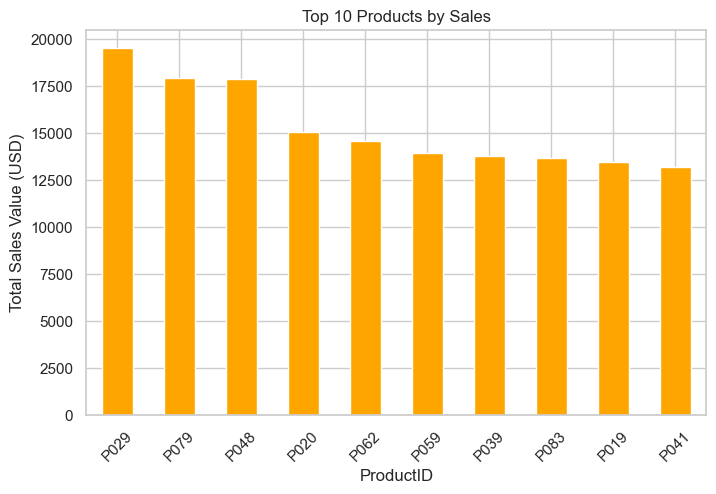

In [60]:
# 5. Top 10 products by sales
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Sales Value (USD)")
plt.xticks(rotation=45)
plt.show()